<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/cemicalsconsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumption of Chemcials in Gas Processing Operations
In this notebook we will demonstrate calculations of chemcials consumption in a number of gas processing operations.

In [1]:
%%capture
!pip install neqsim
import neqsim

# TEG loss to gas phase from dehydration operations

Text(0, 0.5, 'TEG in gas [litre TEG/MSm3 gas]')

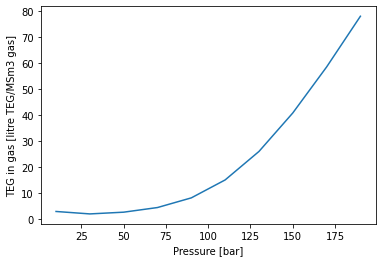

In [5]:
from neqsim.thermo import fluid, fluid_df, printFrame, TPflash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

temperature = 45.0
minPressure = 10.0
maxPressure = 200.0
componentName = 'TEG'

naturalgasDef = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", 'TEG'], 
        'MolarComposition[-]':  [0.39, 0.4382, 71.8873, 11.58, 10.2143, 1.5705, 2.7704, 0.486, 0.4488, 0.1365, 1.0]
} 

naturalgas = fluid_df(pd.DataFrame(naturalgasDef)).setModel('CPAs-SRK-EOS-statoil')
#printFrame(naturalgas)

def gassol(pressure, temperature):
    naturalgas.setPressure(pressure, 'bara')
    naturalgas.setTemperature(temperature, 'C')
    TPflash(naturalgas)
    molarMassTEG = 150.0
    densityTEG = 1.1255
    molSm3 = 42.2949
    TEGinGas = naturalgas.getPhase('gas').getComponent(componentName).getx()*molSm3*molarMassTEG*1e3/densityTEG  # mol TEG / mol gas * mol gas / Sm3 * gr TEG /mol TEG / 1000 ' 1e6  * litre / kg TEG = litre TEG / MSm3
    return TEGinGas

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/10.0)+1.0)
gassolubuility = [gassol(P,temperature) for P in pressure]

plt.plot(pressure, gassolubuility)
plt.xlabel('Pressure [bar]')
plt.ylabel(componentName+ ' in gas [litre TEG/MSm3 gas]')